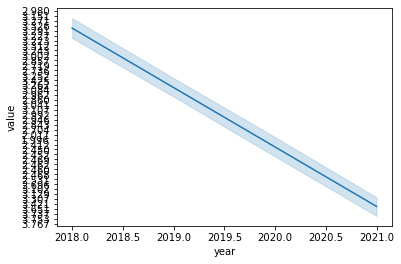

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Areas = pd.read_csv('Areas.csv', sep='\t')
Current = pd.read_csv('Current_Data.csv', sep='\t')
Items = pd.read_csv('Items.csv', sep='\t')
Periods = pd.read_csv('Period_Names.csv', sep='\t')
Series = pd.read_csv('Series.csv', sep='\t')

# NOTE: There are 335 rows of data for every item representing every change in month and year till 2022/Whenever someone is reading this

# I cleaned the data and made the appropriate merges (there is WHITESPACE ** Make Sure To Clean Whitespace) **

complete_df = pd.merge(Series, Areas, on='area_code').merge(Current)
complete_df = complete_df.rename(columns = {'series_id        ': 'series_id', '       value': 'value'})

complete_df['series_id'] = complete_df['series_id'].str.strip()
complete_df['value'] = complete_df['value'].str.strip()


def calculate_change(series_id, start_year, end_year):
    product_table = complete_df[(complete_df['series_id'] == series_id) & (complete_df.year >= start_year) & (complete_df.year < end_year)]
    sns.lineplot(data = product_table, x='year', y='value')
    
    
calculate_change('APUS49G7471A', 2009, 2022)



#complete_df


# I am writing a function to calculate CPI

#def cpiCalc(base_year, base_month, code, current_year, current_month, code2):
    #base_time = complete_df[(complete_df.year == base_year) & (complete_df.period == base_month) & (complete_df['series_id'] == code)]
    #current_time = complete_df[(complete_df.year == current_year) & (complete_df.period == current_month) & (complete_df['series_id'] == code2)]
    #base_year_value = base_time.value
    #current_time_value = current_time.value
    #return base_year_value






